In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import math
import tqdm

### Explore the dataset

In [4]:
df = pd.read_csv('law.csv', index_col=0)
df.shape

(15, 3)

In [5]:
df.head(15)

,observation,LSAT,GPA
1,1,576,3.39
2,2,635,3.30
3,3,558,2.81
4,4,578,3.03
5,5,666,3.44
6,6,580,3.07
7,7,555,3.00
8,8,661,3.43
9,9,651,3.36
10,10,605,3.13


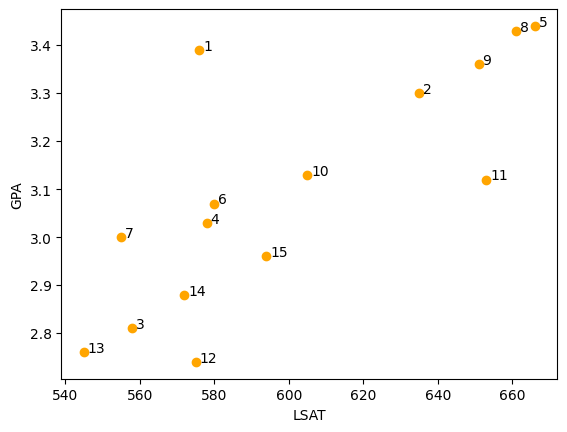

In [4]:
labels = np.arange(1, 16).astype(str)
plt.scatter(df['LSAT'], df['GPA'], color='orange')
for x, y, label in zip(df['LSAT'], df['GPA'], labels):
    plt.text(x+1, y, label)
plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.show()

### Calculate the Pearson's correlation coefficient

In [5]:
df.corr().loc['LSAT']['GPA']

0.7763744912894074

### Removing the outliers points 1 and 11 based on the scatter above

In [7]:
df_dropped = df.drop(labels=[1, 11, 7], axis=0)

In [9]:
df_dropped

,observation,LSAT,GPA
2,2,635,3.30
3,3,558,2.81
4,4,578,3.03
5,5,666,3.44
6,6,580,3.07
8,8,661,3.43
9,9,651,3.36
10,10,605,3.13
12,12,575,2.74
13,13,545,2.76


### Bootstrap and Pearson's coefficient

In [5]:
def nonpar_bootstrap(data, B):
    rs = np.zeros(B)
    for i in tqdm.tqdm(range(B)):
        selected = np.random.choice(data['observation'], size=data['observation'].shape, replace=True)
        bootstrap_df = data.loc[selected]
        #bootstrap_df.index = np.arange(1, data['observation'].shape[0]+1)
        # Pearson's coefficient
        r = bootstrap_df.corr().loc['LSAT']['GPA']
        rs[i] = r
    return rs

In [10]:
t1 = time.time()
rs4 = nonpar_bootstrap(df_dropped, 40000)
t2 = time.time()
delta = t2 - t1
np.save('rs4', rs4)
delta

100%|███████████████████████████████████████████████████████████████████████████| 40000/40000 [01:13<00:00, 544.28it/s]


73.50548839569092

In [11]:
rs1 = np.load('rs1.npy')
rs2 = np.load('rs2.npy')
rs3 = np.load('rs3.npy')
rs4 = np.load('rs4.npy')

In [13]:
rs1.shape, rs2.shape, rs3.shape, rs4.shape

((40000,), (1000000,), (40000,), (40000,))

### P

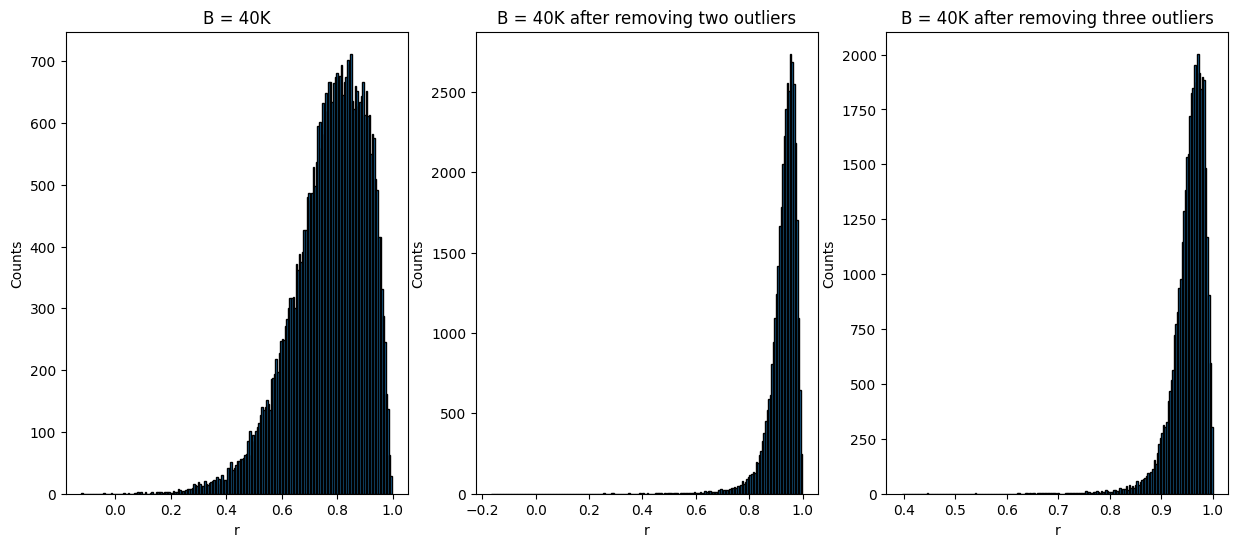

In [16]:
rs = [rs1, rs3, rs4]
titles = ['B = 40K', 'B = 40K after removing two outliers', 'B = 40K after removing three outliers']
fig, axs = plt.subplots(1, 3, figsize=(15, 6))
for ax, r, title in zip(axs, rs, titles):
    ax.hist(r, bins=200, edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel('r')
    ax.set_ylabel('Counts')
plt.show()

In [17]:
fig.savefig('Histograms after three outliers')

### Gray Codes

In [ ]:
n = len(df)
i = 0
# total number of samples - 77558760
total = math.comb(29, 14)

# gray_code zero matrix 77558760 x 15
gray_codes = np.zeros((total, n))
sample = np.zeros(n)

# first sample
sample[0] = n

# first gray code
index_1 = n
sample_index = -1
gray_codes[i] = sample
i += 1

# generate gray codes
while i != total:
  # if gray_code sample is done
  if index_1 != 1:
    sample_index = -1
  
  sample_index = sample_index + 1
  index_1 = sample[sample_index]

  sample[sample_index] = 0
  sample[0] = index_1-1
  sample[sample_index + 1] = sample[sample_index+1] + 1
  
  gray_codes[i] = sample
  i += 1

In [7]:
gray_codes

array([[14.,  0.,  0., ...,  0.,  0.,  0.],
       [13.,  1.,  0., ...,  0.,  0.,  0.],
       [12.,  2.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  6.,  2., ...,  0.,  0.,  0.],
       [ 5.,  0.,  3., ...,  0.,  0.,  0.],
       [ 4.,  1.,  3., ...,  0.,  0.,  0.]])

In [8]:
gray_codes.shape

(40000, 14)

In [9]:
gray_codes_df = pd.DataFrame(gray_codes, columns = [str(x) for x in range(n)]).astype(int)
gray_codes_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13,1,0,0,0,0,0,0,0,0,0,0,0,0
2,12,2,0,0,0,0,0,0,0,0,0,0,0,0
3,11,3,0,0,0,0,0,0,0,0,0,0,0,0
4,10,4,0,0,0,0,0,0,0,0,0,0,0,0
